# Transformada de Fourier discreta

La transformada discreta de fourier se define de la siguiente manera:

$X_{k}=\sum _{n=0}^{N-1}x_{n}e^{-{\frac {2\pi i}{N}}kn}\quad \quad k=0,\dots ,N-1$

La expresión anterior se puede escalar a una matriz unitaria y $X_{k}$ son los coeficientes de x en una base ortonormal.

Por lo que podriamos representar la transformada como sigue:

$X = M ^. x$
 
Donde $M_{kn} = e^{-{\frac {2\pi i}{N}}kn}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Definiendo una funcion para calcular la transformada de fourier

def fourier(x):
    x = np.asarray(x, dtype=float) #convierte x en arreglo de tipo flotante
    N = x.shape[0] # Regresa la dimension del arreglo (en este caso el numero de filas)
    n = np.arange(N) # Regresa un arreglo con valores espaciados de 0 hasta N
    k = n.reshape((N, 1)) # Regresa un arreglo de N-1 por 2 dimensiones.
    M = np.exp(-2j * np.pi * k * n / N) # Regresa la matriz M de la transf. de fourier
    return np.dot(M, x) # Producto punto de matriz M y vector x

# Definiendo curva gaussiana
def gauss(mu,sigma,bins):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )


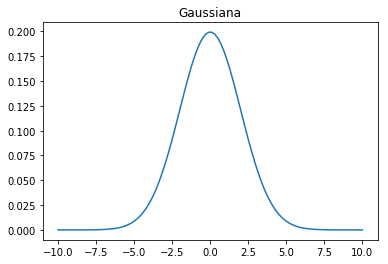

In [3]:
# Generando datos de la gaussiana
sampling_rate = 100 # Hz
start_time = -10
end_time = 10
N = (end_time - start_time)*sampling_rate # array size
t = np.linspace(start_time,end_time,100)

mu = 0.
sigma = 2.
gaussiana = gauss(mu,sigma,t)
plt.plot(t,gauss(mu,sigma,t))
plt.title('Gaussiana')
plt.show()

# Realizando la transformada de fourier de la gaussina
tf = fourier(gaussiana)


In [5]:
# Comparando resultados de tf con el obtenido en fft

print 'Función transformada de Fourier'
print tf 
print

print 'Transformada de Fourier de numpy'
ft = np.fft.fft(gaussiana)
print ft
print 


# También podemos comprobar que los resultados son aproximados como sigue
print 'Fueron aproximados los resultados de las dos funciones: ', np.allclose(tf,ft)
print 

# Y observar cuanto tiempo de cómputo hace cada uno
print 'Tiempo de cómputo de la funcion fourier'
%timeit tf
print

print 'Tiempo de cómputo de la transformada de numpy fft'
%timeit ft


Función transformada de Fourier
[  4.94999784e+00 +0.00000000e+00j  -4.07728184e+00 -1.28133744e-01j
   2.27858700e+00 +1.43356543e-01j  -8.63955529e-01 -8.16678424e-02j
   2.22248160e-01 +2.80764719e-02j  -3.87913111e-02 -6.14394009e-03j
   4.59173430e-03 +8.75920163e-04j  -3.70254967e-04 -8.27617906e-05j
   1.90042196e-05 +4.87945425e-06j  -1.71368939e-06 -4.97872793e-07j
  -8.30180451e-07 -2.69741979e-07j  -7.43112885e-07 -2.67537102e-07j
  -6.50625281e-07 -2.57600774e-07j  -5.70768127e-07 -2.46993424e-07j
  -5.01622051e-07 -2.36045420e-07j  -4.41702279e-07 -2.25058554e-07j
  -3.89678138e-07 -2.14227367e-07j  -3.44391883e-07 -2.03672792e-07j
  -3.04852543e-07 -1.93465307e-07j  -2.70220034e-07 -1.83641354e-07j
  -2.39785960e-07 -1.74214696e-07j  -2.12954375e-07 -1.65184346e-07j
  -1.89224194e-07 -1.56539865e-07j  -1.68173747e-07 -1.48265106e-07j
  -1.49447561e-07 -1.40340600e-07j  -1.32745285e-07 -1.32745281e-07j
  -1.17812451e-07 -1.25457522e-07j  -1.04432880e-07 -1.18455848e-07j
  